# Cyber Security In Banking
## Credit Card Fraud Detection



Amita Mehta (0730478),    
Rajit (0730468),    
Jai Surya (0731608)

### Import Packages

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")



C:\Users\PC\Anaconda3\envs\DAB300\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\Anaconda3\envs\DAB300\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\Anaconda3\envs\DAB300\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\Anaconda3\envs\DAB300\lib\site-packages\tensorflow\python\framework

### Read the File

In [2]:
train = pd.read_csv('train_data.csv', index_col = 0, parse_dates = True)

### Undestanding the data

In [3]:
train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,...,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,...,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579
std,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,...,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000
75%,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000
max,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000


### Data Cleaning

In [4]:
train.isnull().sum()

isFraud                0
TransactionDT          0
TransactionAmt         0
productcd              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
p_emaildomain      94456
r_emaildomain     453249
v1                279287
v2                279287
v3                279287
v4                279287
v5                279287
v6                279287
v7                279287
v8                279287
v9                279287
v10               279287
v11               279287
v12                76073
v13                76073
v14                76073
                   ...  
c9                     0
c10                    0
c11                    0
c12                    0
c13                    0
c14                    0
d1                  1269
d2                280797
d3                262878


### Drop the null values

In [5]:
# Remove the unecessary column
df= train.drop(['productcd','card4','card6','p_emaildomain','r_emaildomain','m1','m2','m3','m4','m5','m6','m7','m8','m9'
],axis=1)
df.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,...,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,...,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(axis=1,inplace=True)

In [7]:
# Check the skewness
df.skew()

isFraud            5.061223
TransactionDT      0.131155
TransactionAmt    14.374490
card1             -0.040929
c1                23.957960
c2                23.677433
c3                88.949746
c4                22.077659
c5                 5.793670
c6                19.766863
c7                27.194050
c8                26.083382
c9                 5.693750
c10               25.220514
c11               22.356975
c12               27.415129
c13                8.986417
c14               16.534887
dtype: float64

In [8]:
# Columns
df.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'c1', 'c2', 'c3',
       'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14'],
      dtype='object')

### Check Whether the data is balance or not

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


Text(0.5, 1.0, 'Distribution of Credit Card Transactions')

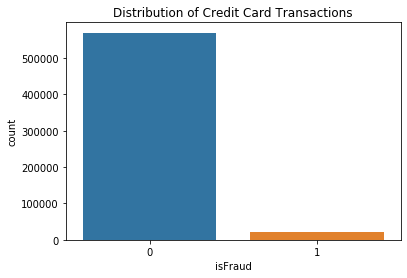

In [10]:
# Plot the histogram to whether the transaction 
colors = ["#0101DF", "#DF0101"]

sns.countplot(df['isFraud'])
plt.title('Distribution of Credit Card Transactions')

### Distribution Plot for Transaction amount and data time

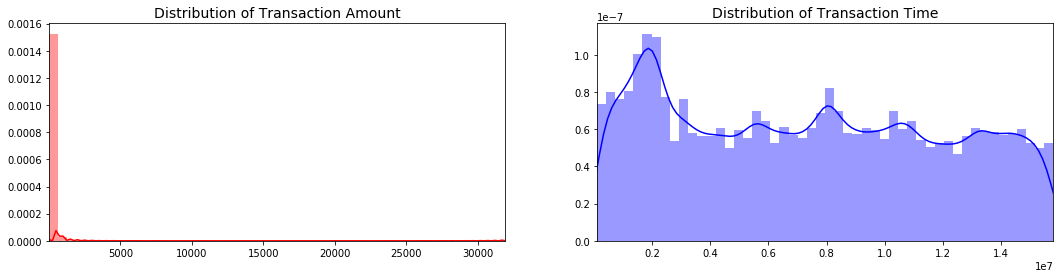

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['TransactionAmt'].values
time_val = df['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Scaling

In [12]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['TransactionAmt'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['TransactionDT'].values.reshape(-1,1))

df.drop(['TransactionDT','TransactionAmt'], axis=1, inplace=True)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,isFraud,card1,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
TransactionID,,,,,,,,,,,,,,,,,,
2987000,-0.003293,-0.878408,0,13926,1,1,0,0,0,1,0,0,1,0,2,0,1,1
2987001,-0.486894,-0.878408,0,2755,1,1,0,0,0,1,0,0,0,0,1,0,1,1
2987002,-0.119602,-0.878399,0,4663,1,1,0,0,0,1,0,0,1,0,1,0,1,1
2987003,-0.229790,-0.878396,0,18132,2,5,0,0,0,4,0,0,1,0,1,0,25,1
2987004,-0.229790,-0.878395,0,4497,1,1,0,0,0,1,0,1,0,1,1,0,1,1


In [14]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('isFraud', axis=1)
y = df['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset
Train: [116771 116772 116773 ... 590537 590538 590539] Test: [     0      1      2 ... 154537 154538 154540]
Train: [     0      1      2 ... 590537 590538 590539] Test: [116771 116772 116773 ... 253312 253376 253392]
Train: [     0      1      2 ... 590537 590538 590539] Test: [235448 235449 235450 ... 366821 366862 366877]
Train: [     0      1      2 ... 590537 590538 590539] Test: [353901 353902 353903 ... 472501 472502 472503]
Train: [     0      1      2 ... 472501 472502 472503] Test: [470280 470286 470298 ... 590537 590538 590539]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.96500879 0.03499121]
[0.96501477 0.03498523]


In [15]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:20663]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,scaled_amount,scaled_time,isFraud,card1,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
TransactionID,,,,,,,,,,,,,,,,,,
3241091,-0.229790,-0.151627,0,8049,1,1,0,1,0,0,0,1,0,1,1,0,2,1
3317591,1.924987,0.098975,1,7069,1,1,0,0,0,1,0,0,1,0,1,0,1,1
3272146,-0.119602,-0.038173,1,12932,1,1,0,0,0,1,0,0,0,0,1,0,1,1
3466029,-0.242033,0.623536,0,10186,1,7,0,0,0,3,0,0,1,0,1,0,9,1
3209752,-0.491314,-0.249741,1,10568,9,46,0,9,0,9,9,14,0,15,3,3,11,6


In [16]:
new_df.tail()

,scaled_amount,scaled_time,isFraud,card1,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14
TransactionID,,,,,,,,,,,,,,,,,,
3058974,-0.229790,-0.692376,1,1764,1,1,0,1,0,1,0,1,0,1,1,0,0,0
3273654,1.924987,-0.030724,1,11157,1,1,0,0,0,1,0,0,1,0,1,0,1,1
3097570,0.994515,-0.626112,0,7207,1,1,0,1,0,1,0,1,0,1,1,0,1,1
3527788,3.014618,0.845176,1,16659,1,1,0,0,0,1,0,0,1,0,1,0,0,0
3285883,-0.431384,0.011001,1,5009,24,12,0,3,0,3,3,4,0,5,8,8,2,2


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: isFraud, dtype: float64


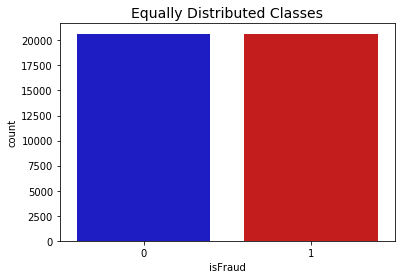

In [17]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))



sns.countplot('isFraud', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Correlation Matrix

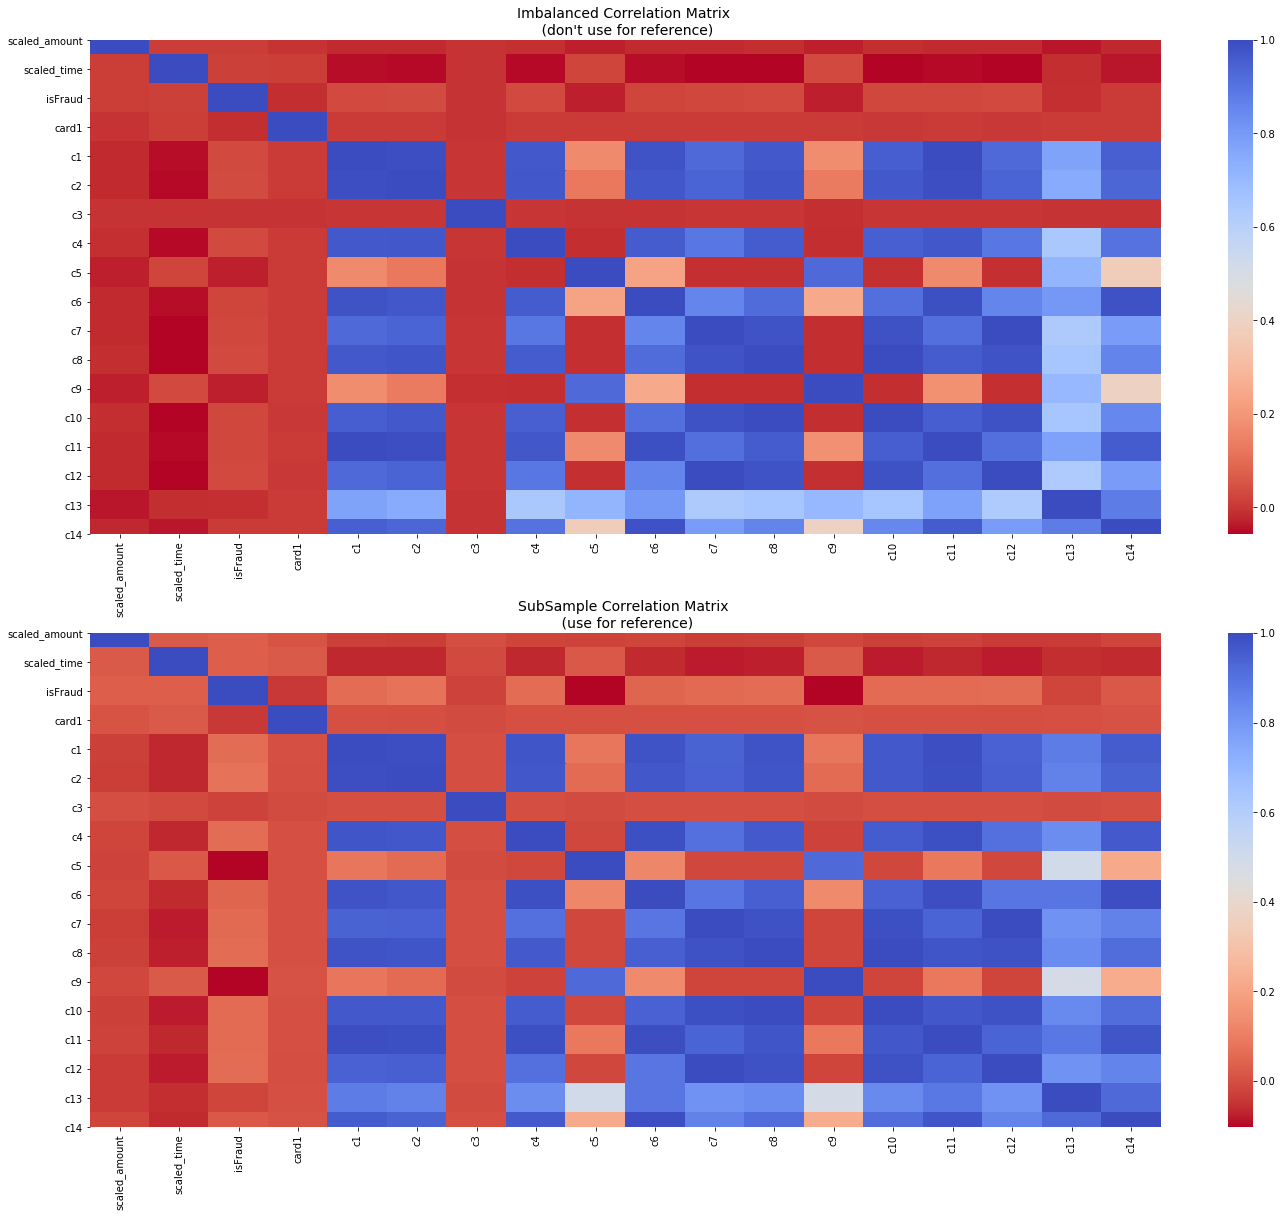

In [18]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

### Modeling

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 69.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 79.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# We will undersample during cross validating
undersample_X = df.drop('isFraud', axis=1)
undersample_y = df['isFraud']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))